### Context

While I was practicing machine learning, I wanted to create a simple dataset that is closely aligned to the real world scenario and gives better results to what my appetite on this domain. If you are a beginner who wants to try solving classification problems in machine learning and if you prefer achieving better results, try using this dataset in your projects which will be a great place to start.

### Content

This dataset contains 7 features and a label column.

* long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
* forehead_width_cm - This column is in CM's. This is the width of the forehead.
* forehead_height_cm - This is the height of the forehead and it's in Cm's.
* nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
* nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
* lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
* distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".
* gender - This is either "Male" or "Female".

### Acknowledgements

Nothing to acknowledge as this is just a made up data.

### Inspiration

It's painful to see bad results at the beginning. Don't begin with complicated datasets if you are a beginner. I'm sure that this dataset will encourage you to proceed further in the domain. Good luck.

In [279]:
import numpy as np
import pandas as pd
import math
import glob
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
pd.options.mode.chained_assignment = None

In [280]:
# read and load file
df= pd.read_csv('downloads/gender_classification_v7.csv')

In [281]:
# head of the file
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [282]:
#tail of the file
df.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [283]:
# the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [284]:
# the shape of the data
df.shape

(5001, 8)

In [285]:
# Checking for null values
df.isnull()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False
4999,False,False,False,False,False,False,False,False


In [286]:
# summing of null values
df.isna().sum().sort_values()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [287]:
# the columns of the file
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [288]:
# checking of correlations 
df.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


<AxesSubplot:>

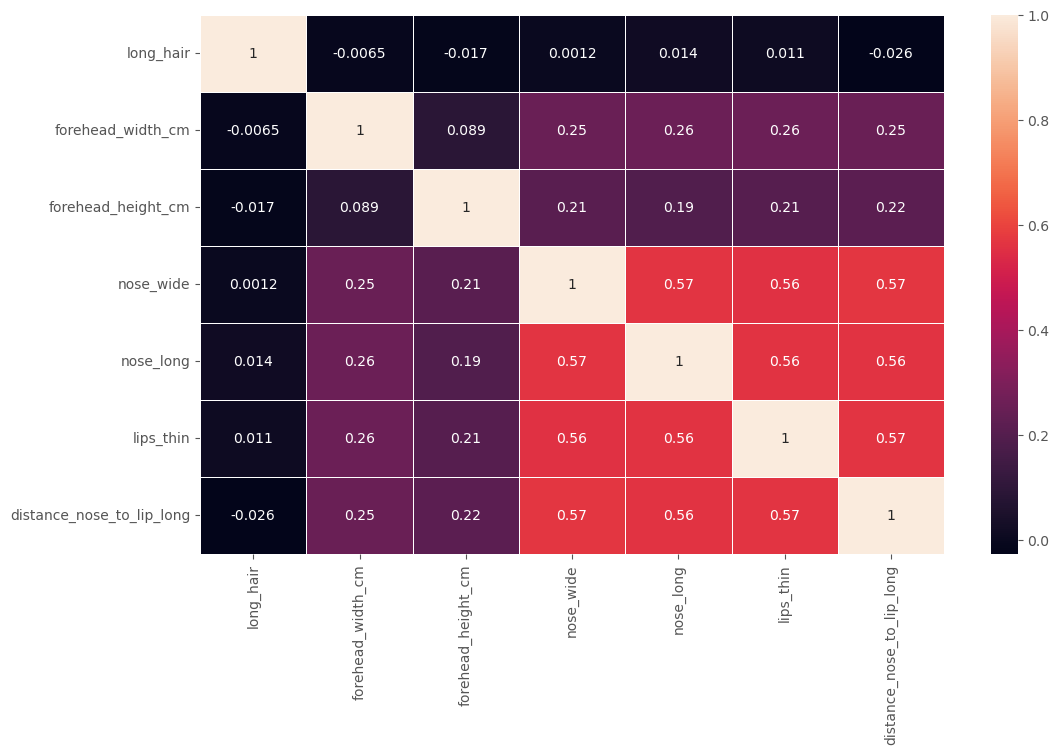

In [289]:
# checking of correlations using heatmap
corel= df.corr()
fig, ax= plt.subplots(figsize=(12,7))
sns.heatmap(corel, linewidth=0.5, annot= True)

In [290]:
gen= df['gender'].value_counts()
print(gen)

Female    2501
Male      2500
Name: gender, dtype: int64


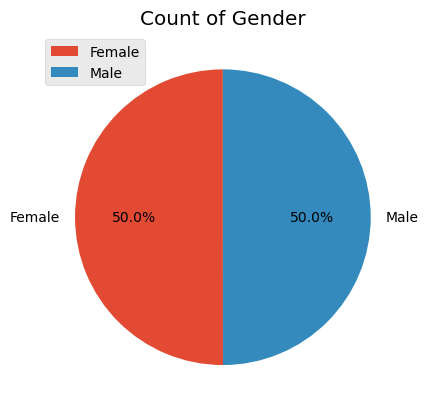

In [291]:
plt.pie(gen, labels = gen.index, autopct = '%1.1f%%', startangle = 90 )
plt.legend(labels = gen.index, loc = 'upper left')
plt.title('Count of Gender')
plt.show()

### Observation
* From the observation we have 2501 Females and 2500 Males, meaning we have more Females than Male.

In [292]:
long= df[['gender','long_hair']].groupby(df.gender).sum().sort_values(by= 'gender', ascending = True)
print(long)

        long_hair
gender           
Female       2184
Male         2165


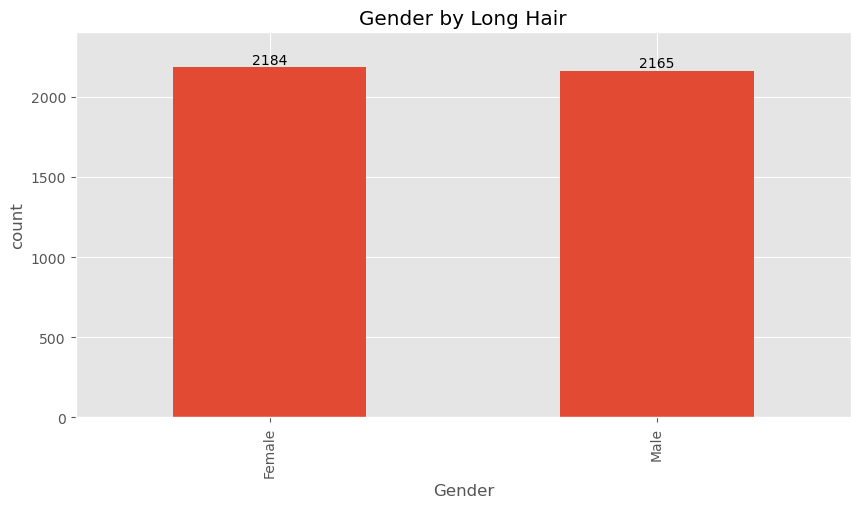

In [293]:
# plot the bar chart to show labels

ax = long.plot(kind = 'bar', figsize = (10, 5), title = 'Gender by Long Hair', xlabel = 'Gender', 
                  ylabel = 'count', legend = False)

# annotate
ax.bar_label(ax.containers[0], label_type = 'edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y = 0.1)

### Observation:
* from my observation, it is observed that we have more females with long hair than males with long hair.

<Figure size 2000x1500 with 0 Axes>

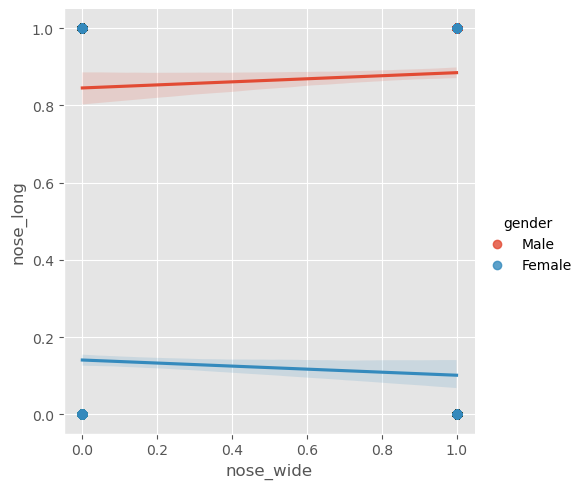

In [294]:
# visualizing nose_wide and noise_wide by gender

plt.figure(figsize = (20, 15))
sns.lmplot(x = 'nose_wide', y = 'nose_long', data = df, hue = 'gender')

### Observation:
* from my observation, it is observed that we have males with long nose compared to females.

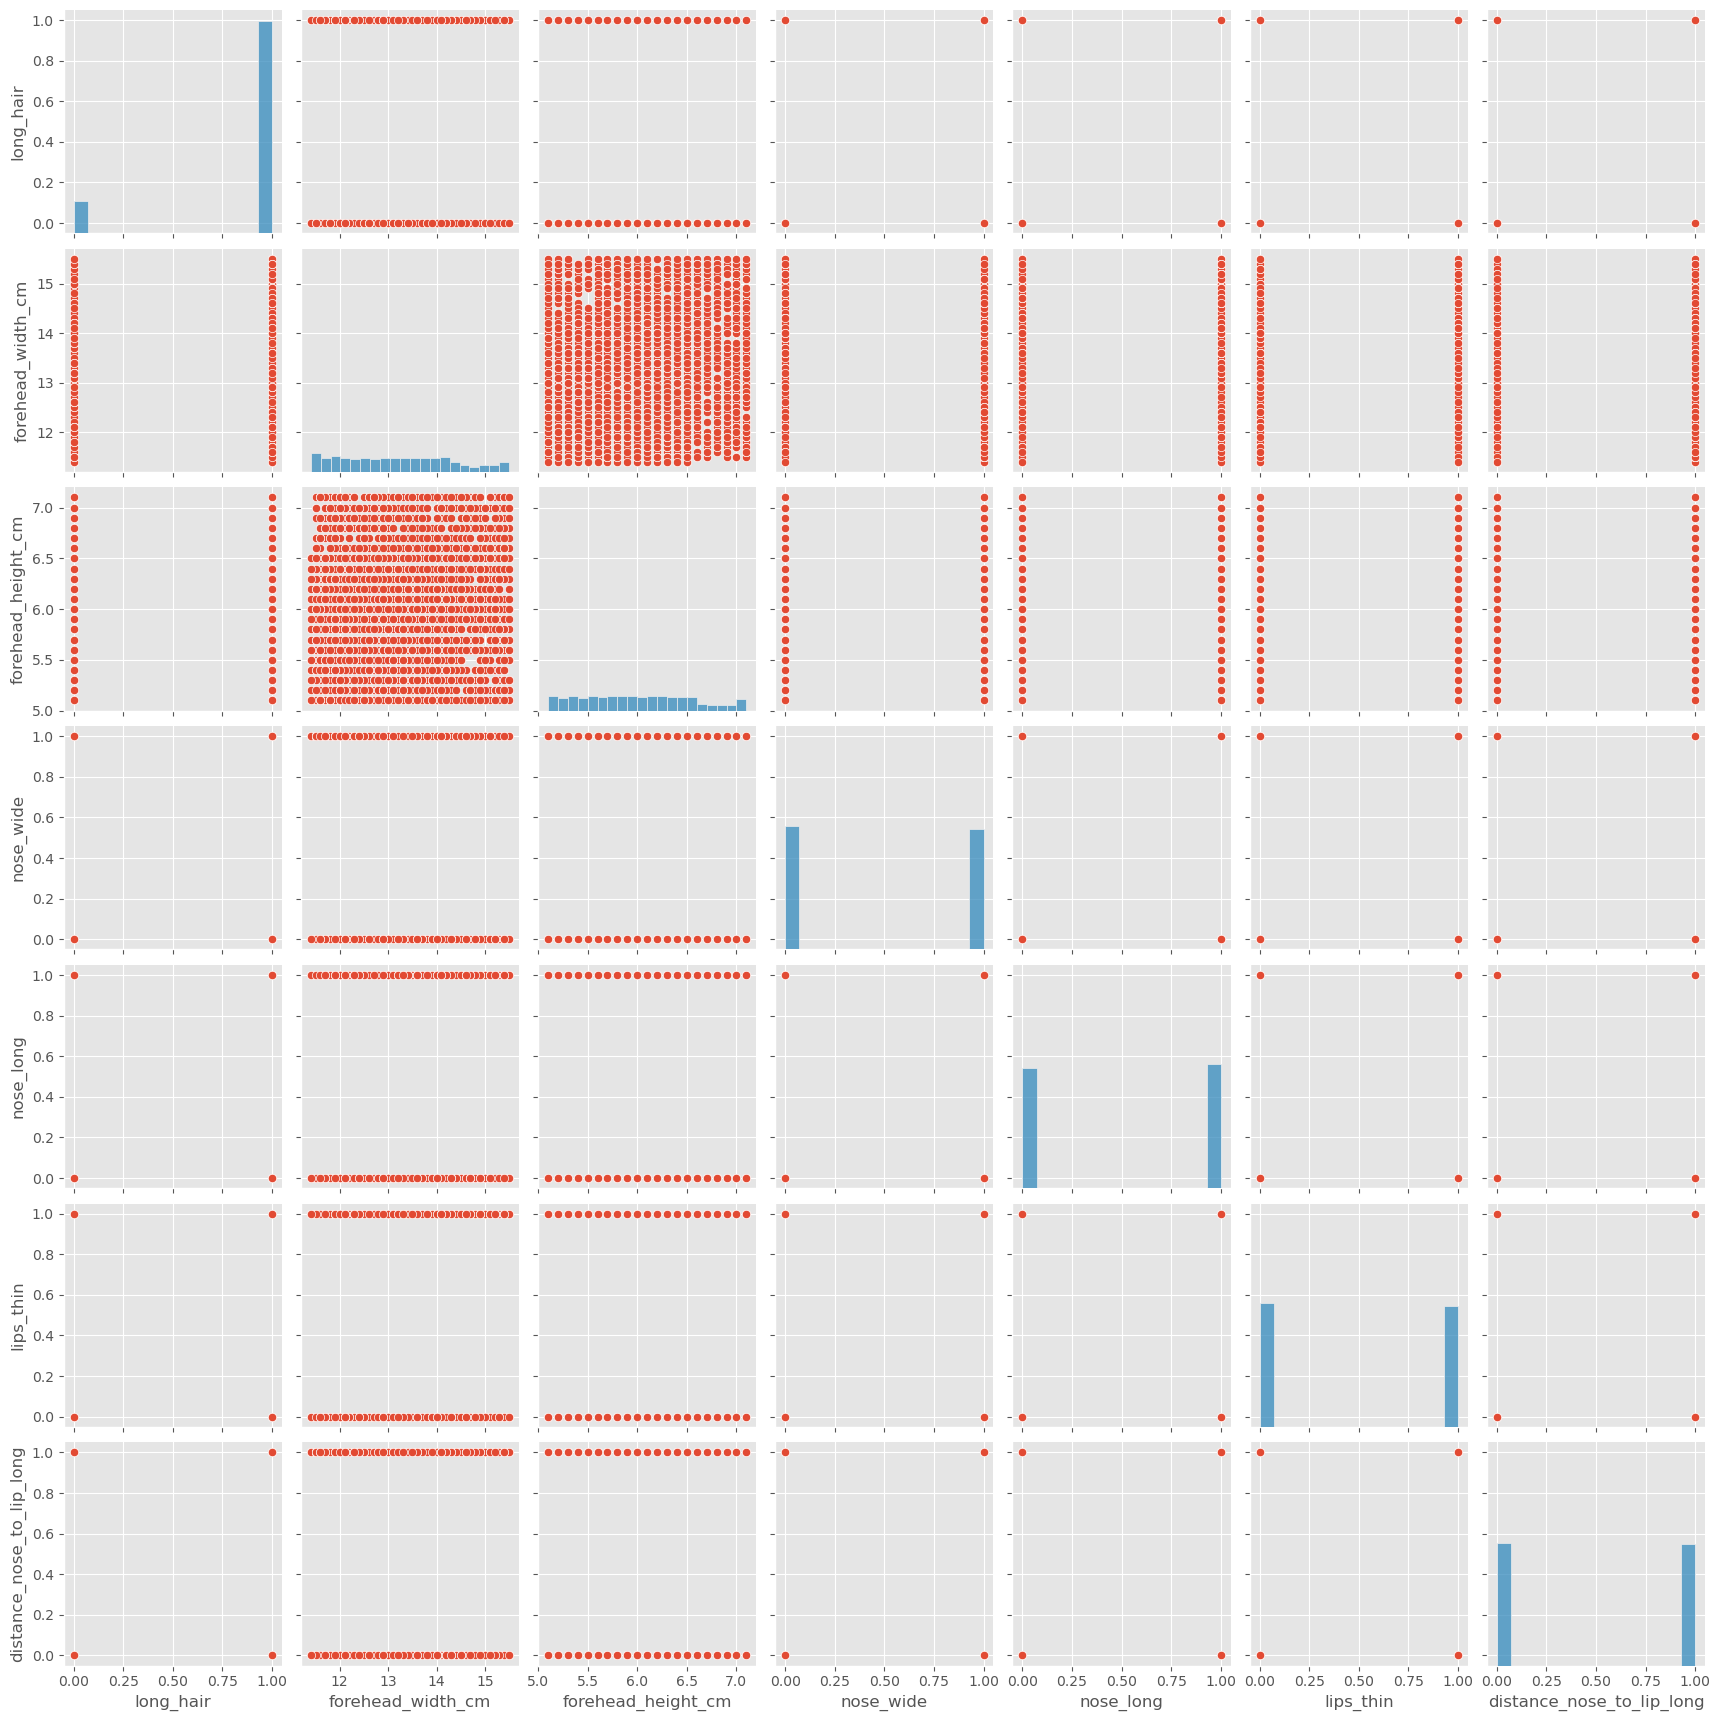

In [295]:
# pairplot for numerical features
sns.pairplot(data = df)

In [296]:
# conditional statement for target
def target(x):
    if x =='Male':
        return 1
    else:
        return 0
df['gender']= df['gender'].apply(target)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [452]:
#spliting the futures and the target column
y= df.gender
X= df.drop('gender', axis=1)
X.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [453]:
# split into training and test sets using 40% split ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

In [454]:
#import StandardScaler for Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [455]:
# Decision Tree Classifier algorithm
from sklearn.tree import DecisionTreeClassifier

# create the model
DC_model = DecisionTreeClassifier()

# fit the model
DC_model.fit(X_train, y_train)

# create the prediction
DC_preds = DC_model.predict(X_test)

# import accuracy score
from sklearn.metrics import accuracy_score

# print accuracy score
print(accuracy_score(DC_preds, y_test) * 100)

96.0519740129935


In [456]:
# import the random forest classifier
from sklearn.ensemble import RandomForestClassifier

# create model
RF_model = RandomForestClassifier()

# fit the model
RF_model.fit(X_train, y_train)

# create the prediction
RF_preds = RF_model.predict(X_test)

# import accuracy score
from sklearn.metrics import accuracy_score

# print accuracy score
print(accuracy_score(RF_preds, y_test) * 100)

96.55172413793103


In [457]:
# import the KNeighbor classifier
from sklearn.neighbors import KNeighborsClassifier

# create the model
KN_model = KNeighborsClassifier()

# fit your model
KN_model.fit(X_train, y_train)

# create the prediction
KN_preds = KN_model.predict(X_test)

# import accuracy score
from sklearn.metrics import accuracy_score

# print accuracy score
print(accuracy_score(KN_preds, y_test) * 100)

96.45177411294354


In [458]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

# Building a Support Vector Machine on the training set
svc_model = SVC(C = .1, kernel = 'linear', gamma = 1)

# fit the model
svc_model.fit(X_train, y_train)

# create the prediction
SVM_preds = svc_model.predict(X_test)

# print accuracy score
print(accuracy_score(SVM_preds, y_test) * 100)

# check the accuracy on the training set
print(svc_model.score(X_train, y_train) * 100)

96.55172413793103
96.89999999999999


In [459]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

# fit the model
xgb_clf.fit(X_train, y_train)

# create the prediction
xgb_preds = xgb_clf.predict(X_test)

# import accuracy score
from sklearn.metrics import accuracy_score

# print accuracy score
print(accuracy_score(xgb_preds, y_test) * 100)

96.20189905047476


In [460]:
from sklearn.linear_model import LogisticRegression

# create the model
LR_model = LogisticRegression()

# fit the model
LR_model.fit(X_train, y_train)

# create the prediction
LR_preds = LR_model.predict(X_test)

# import accuracy score
from sklearn.metrics import accuracy_score

# print accuracy score
print(accuracy_score(y_test, LR_preds) * 100)

96.45177411294354


In [461]:
# Confusion Matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

In [462]:
# split into training and validation sets using 40% split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4,random_state=42)

In [463]:
#create list of your model names
models = [DC_model, RF_model, KN_model, svc_model, xgb_clf, LR_model]

In [464]:
def plot_confusion_matrix(y_valid, prediction):
    cm_ = confusion_matrix(y_valid, prediction)
    plt.figure(figsize = (6, 4))
    sns.heatmap(cm_, cmap = 'coolwarm',
               linecolor = 'white',
               linewidths = 1,
               annot = True,
               fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [465]:
from sklearn.metrics import confusion_matrix

In [466]:
# create function to train a model and evaluate accuracy
def trainer(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train) # to fit the model
    prediction = model.predict(X_valid) # predict on the fitted model
    # print evaluation metrics
    print('\n For{}, Accuracy Score is {} \n'.format(model.__class__.__name__, accuracy_score(prediction, y_valid)))
    print(classification_report(y_valid,prediction)) # classification report for evaluating our models
    plot_confusion_matrix(y_valid, prediction)


 ForDecisionTreeClassifier, Accuracy Score is 0.95952023988006 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       984
           1       0.96      0.96      0.96      1017

    accuracy                           0.96      2001
   macro avg       0.96      0.96      0.96      2001
weighted avg       0.96      0.96      0.96      2001



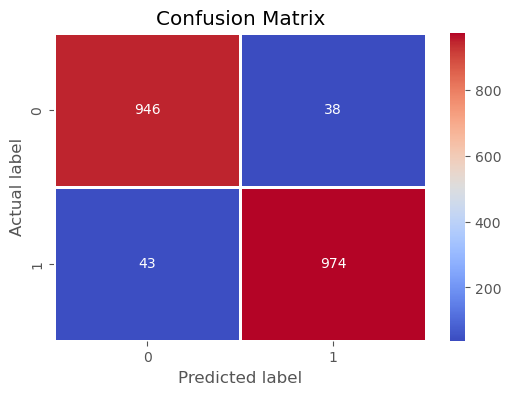


 ForRandomForestClassifier, Accuracy Score is 0.9655172413793104 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       984
           1       0.97      0.96      0.97      1017

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.97      2001
weighted avg       0.97      0.97      0.97      2001



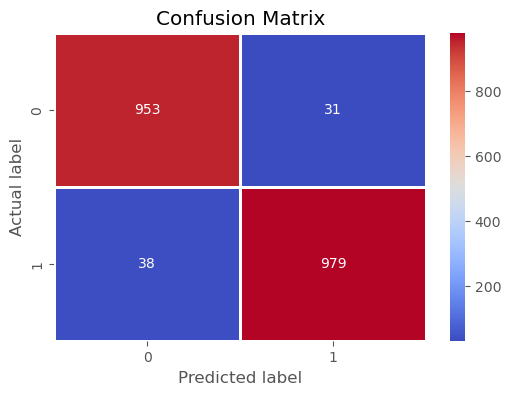


 ForKNeighborsClassifier, Accuracy Score is 0.9620189905047476 

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       984
           1       0.97      0.96      0.96      1017

    accuracy                           0.96      2001
   macro avg       0.96      0.96      0.96      2001
weighted avg       0.96      0.96      0.96      2001



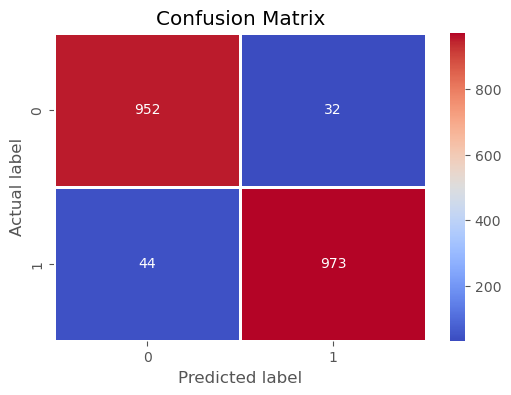


 ForSVC, Accuracy Score is 0.9630184907546226 

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       984
           1       0.96      0.97      0.96      1017

    accuracy                           0.96      2001
   macro avg       0.96      0.96      0.96      2001
weighted avg       0.96      0.96      0.96      2001



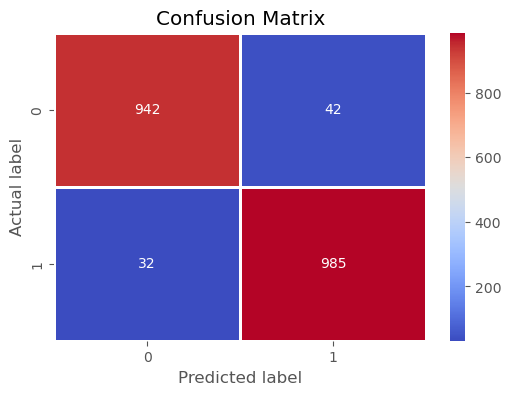


 ForXGBClassifier, Accuracy Score is 0.9620189905047476 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       984
           1       0.97      0.96      0.96      1017

    accuracy                           0.96      2001
   macro avg       0.96      0.96      0.96      2001
weighted avg       0.96      0.96      0.96      2001



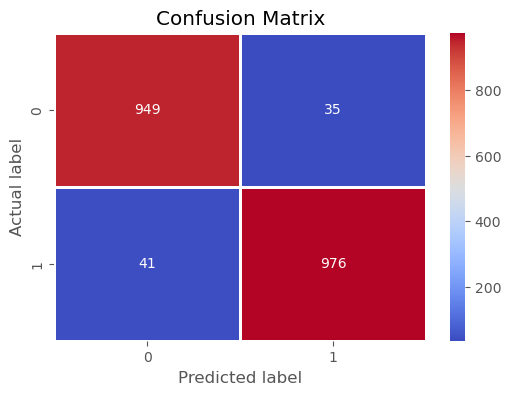


 ForLogisticRegression, Accuracy Score is 0.9630184907546226 

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       984
           1       0.96      0.97      0.96      1017

    accuracy                           0.96      2001
   macro avg       0.96      0.96      0.96      2001
weighted avg       0.96      0.96      0.96      2001



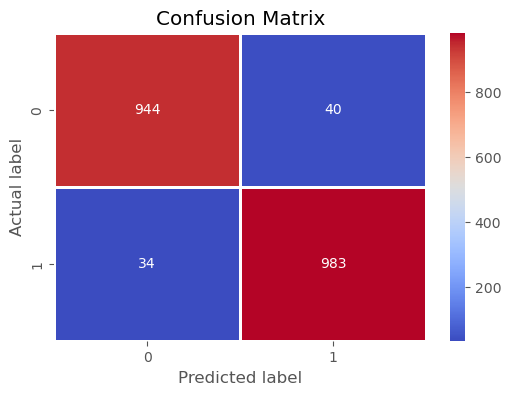

In [467]:
# loop through each model, training in the process..
for model in models:
    trainer(model, X_train, y_train, X_valid, y_valid)

### Observation on Metric Evalaution

The RandomForestClassifier model has been trained on a dataset, and the model evaluation metrics are as follows: the accuracy of the model is 96.6%, recall of 0.96, precision of 0.97, and f1-score of 0.97. These metrics indicate that the model is performing exceptionally well on the dataset and has achieved high accuracy in predicting the outcome.The accuracy of the model is 96.6%, which suggests that the model has correctly predicted 96.6% of the cases. The recall of 0.96 indicates that out of all the true positive cases, the model has correctly identified 96% of them. The precision of 0.97 means that out of all the cases the model has predicted as positive, 97% of them are true positives. The f1-score of 0.97 is the harmonic mean of precision and recall, indicating that the model is performing well in both of these metrics.Overall, these metrics suggest that the RandomForestClassifier model has learned the patterns in the data accurately and can make accurate predictions. However, it is important to note that the model's performance may vary depending on the specific dataset and the problem being solved. Further analysis and tuning of the model may be required for different datasets or problem domains.

### Inspect Feature Importances

Feature importance refers to a technique that calculate a score for all imput features for a given model- the scores simply reperesent the importance of each feature. A higher score means that a specific feature will have a larger effect on the model that has been used to predict our target variable.

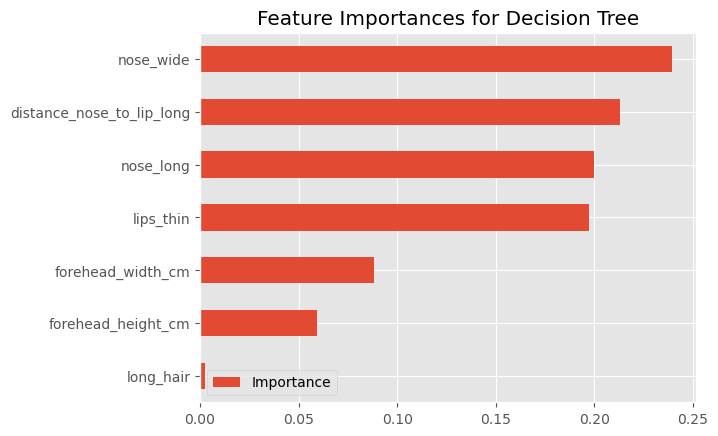

In [433]:
# get feature importance
RF_model_importances = pd.DataFrame(data =  RF_model.feature_importances_, index = X_valid.columns, columns = ['Importance'])

# plot top 10 feature importance, sorted
RF_model_importances[:10].sort_values(by = 'Importance').plot.barh()

plt.title('Feature Importances for Decision Tree')
plt.show()

### Observation

It is observed that nose_wide, distance_nose_to_lip_long and lips_thin contribute a larger percentage of about 0.25 and 0.22 respectively to the prediction of our target variable on a RandomForestClassifier model that has been trained and validated.


### A Bit of Feature Selection

* using few features to predict, mostly the important features

In [434]:
RF_model_importances[3 : 7].sort_values(by = 'Importance').index.values

array(['lips_thin', 'nose_long', 'distance_nose_to_lip_long', 'nose_wide'],
      dtype=object)

In [435]:
# Create a new X train with only 5 features
X_train2 = X_train[['lips_thin', 'distance_nose_to_lip_long', 'nose_long', 'nose_wide']]
X_train2.head()

,lips_thin,distance_nose_to_lip_long,nose_long,nose_wide
1088,0,0,0,0
479,1,1,1,1
727,1,1,1,1
3783,0,1,1,1
976,0,0,0,0


In [436]:
# Create a new X_valid with only 6 features so we can predict on them
X_valid2 = X_valid[['lips_thin', 'distance_nose_to_lip_long', 'nose_long', 'nose_wide']]

In [437]:
# Train and predict
RF_model.fit(X_train2, y_train)
pred2 = RF_model.predict(X_valid2)

# Print accuracy score
print(accuracy_score(pred2, y_valid))

0.9560219890054973


### Observation

it is observed that RandomForestClassifier has an accuracy of approximately 96% based on the feature importance and selection done in other to see those that contributed most to the model performance and its accuracy when retrained with a training set of the selected features.

### Evaluation with K-Fold Cross Validation

cross validation, which is sometimes called rotation estimation or out-of-sample testing, is a model validation technique for assessing how the results of a statistical analysis or model performance will fit into an unseen dataset. The main purpose is to to prevent overfitting; which occurs when a model is trained too well on the training dataset and performs poorly on a new, unseen dataset.

In [438]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
import warnings
warnings.filterwarnings("ignore")
# prepare the cross-validation procedure
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

In [439]:
# create a function to train a model with cross validation and evalaute accuracy
def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = 1) # evaluate model
    
    print('Accuracy: %.3f' % (mean(scores)))

In [440]:
# train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, X_train, y_train)

Accuracy: 0.965
Accuracy: 0.972
Accuracy: 0.972
Accuracy: 0.966
Accuracy: 0.969
Accuracy: 0.969


In [441]:
# create a function to train a model with cross validation and evalaute precision
def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'precision', cv = cv, n_jobs = 1) # evaluate model
    
    print('Precision: %.3f' % (mean(scores)))

In [166]:
# train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, X_train, y_train)

Precision: 0.958
Precision: 0.969
Precision: 0.974
Precision: 0.966
Precision: 0.969
Precision: 0.967


In [167]:
# create a function to train a model with cross validation and evalaute recall
def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'recall', cv = cv, n_jobs = 1) # evaluate model
    
    print('Recall: %.3f' % (mean(scores)))

In [168]:
# train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, X_train, y_train)

Recall: 0.956
Recall: 0.965
Recall: 0.956
Recall: 0.966
Recall: 0.964
Recall: 0.962


### Summary on K-fold Cross Validation

it is seen that the RandomForestClassifier model has predicted well and can generalize on a new data set based on the average score of 97.2% accuracy and a recall of 96.5% compared to the other model trained. The model is ready for deployment. 

In [468]:
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate,true_positive_rate,threshold = roc_curve(y_test,RF_preds)
auc_score = roc_auc_score(y_test,RF_preds)
print(f'The Area Under ROC Curv Score is {auc_score*100}%')

The Area Under ROC Curv Score is 96.55820562630404%


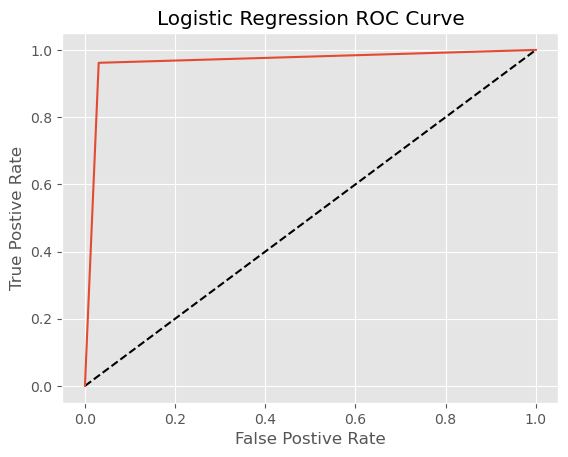

In [469]:
fpr, tpr, thresholds = roc_curve(y_test,RF_preds)
plt.plot([0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

### Observation 
ROC (Receiver Operating Characteristic) Curve

* It is the plot of True Positive Rate against False Postive Ratefor the different possible cutpoints of a diagnostic test.

* An ROC Curve demostrate several things, including;

* It shows the trade off between sensitivity and specificity; has an increase in sensitivity will be accompanied by a decrease in specificity.
* The closer the curve follows the left-hand border and then the top right border of the ROC space, the more accurate the test
* The closer the curve is to the 45 degree diagonal line, the lesser the accuracy of the test
  the area under the curve(AUC) is the measure of test accuracy

### Name: Sowunmi Olusoji Peter